**Neural Networks (Deep Learning)**

The Neural Network Model
MLPs can be viewed as generalizations of linear models which perform multiple
stages of processing to come to a decision.
Remember that the prediction by a linear regressor is given as:
In words, y is a weighted sum of the input features x[0] to x[p], weighted by the
learned coefficients w[0] to w[p]. We could visualize this graphically as:

     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=51ab8244325ebaf88560b926476783345db257d35d242cb715a3a4d720f4b705
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


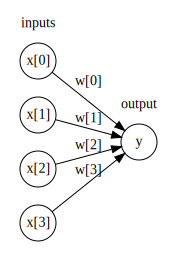

In [4]:
!pip install mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import mglearn
import warnings
warnings.filterwarnings('ignore')
mglearn.plots.plot_logistic_regression_graph()

where each node on the left represents an input feature, the connecting lines repre‐
sent the learned coefficients, and the node on the right represents the output, which is
a weighted sum of the inputs.
In an MLP, this process of computing weighted sums is repeated multiple times, first
computing hidden units that represent an intermediate processing step, which are
again combined using weighted sums, to yield the final result:

Figure single_hidden_layer


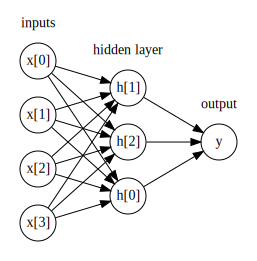

In [5]:
print("Figure single_hidden_layer")
mglearn.plots.plot_single_hidden_layer_graph()


This model has a lot more coefficients (also called weights) to learn: there is one
between every input and every hidden unit (which make up the hidden layer), and
one between every unit in the hidden layer and the output.
Computing a series of weighted sums is mathematically the same as computing just
one weighted sum, so to make this model truly more powerful than a linear model,
there is one extra trick we need. After computing a weighted sum for each hidden
unit, a non-linear function is applied to the result, usually the rectifying nonlinearity
(also known as rectified linear unit or relu) or the tangens hyperbolicus (tanh). The
result of this function is then used in the weighted sum that computes the output y.
The two functions are visualized in Figure activation_functions. The relu cuts off val‐
ues below zero, while tanh saturates to -1 for low input values and +1 for high input
values. Either non-linear function allows the neural network to learn much more
complicated function than a linear model could.


Text(0.5, 1.0, 'activation_functions')

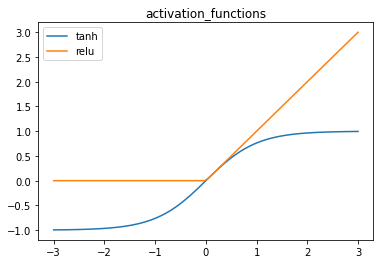

In [6]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.title("activation_functions")


For the small neural network pictures in Figure single_hidden_layer above, the full
formula for computing y in the case of regression would be (when using a tanh nonlinearity):
Here, w are the weights between the input x and the hidden layer h, and v are the
weights between the hidden layer h and the output y. The weights v and w are learned
from data, x are the input features, y is the computed output, and h are intermediate
computations.
An important parameter that needs to be set by the user is the number of nodes in the
hidden layer, and can be as small as 10 for very small or simple datasets, and can be as
big as 10000 for very complex data.
It is also possible add additional hidden layers, as in Figure two_hidden_layers below.
Having large neural networks made up of many of these layers of computation is
what inspired the term “deep learning”.

Figure two_hidden_layers


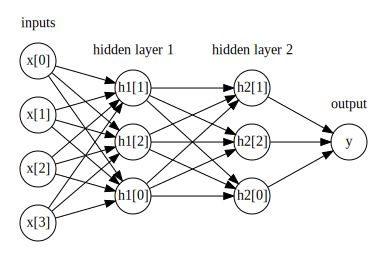

In [7]:
print("Figure two_hidden_layers")
mglearn.plots.plot_two_hidden_layer_graph()

**Tuning Neural Networks**
Let’s look into the workings of the MLP by applying the MLPClassifier to the
two_moons dataset we saw above.


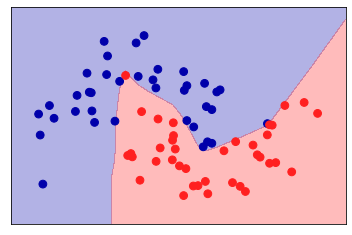

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

As you can see, the neural network learned a very nonlinear but relatively smooth
decision boundary.
We used algorithm='lbfgs' which we will discuss later.
By default, the MLP uses 100 hidden nodes, which is quite a lot for this small dataset.
We can reduce the number (which reduces the complexity of the model) and still get
a good result:


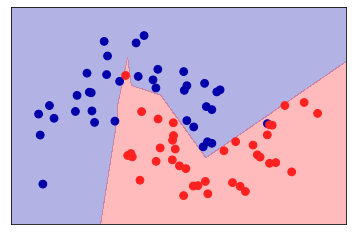

In [15]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

With only 10 hidden units, the decision boundary looks somewhat more ragged. The
default nonlinearity is ‘relu', shown in Figure activation_function. With a single hid‐
den layer, this means the decision function will be made up of 10 straight line seg‐
ments. If we want a smoother decision boundary, we could either add more hidden
units (as in the figure above), add second hidden layer, or use the “tanh” nonlinearity:

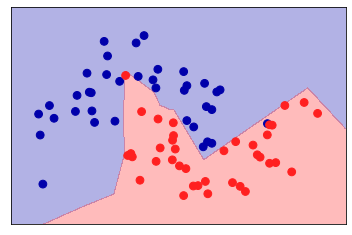

In [16]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

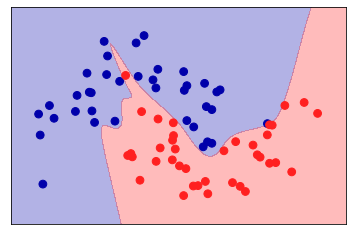

In [17]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
 random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)


Finally, we can also control the complexity of a neural network by using an “l2” pen‐
alty to shrink the weights towards zero, as we did in ridge regression and the linear
classifiers. The parameter for this in the MLPClassifier is alpha (as in the linear
regression models), and is set to a very low value (little regularization) by default.
Here is the effect of different values of alpha on the two_moons dataset, using two
hidden layers of 10 or 100 units each:

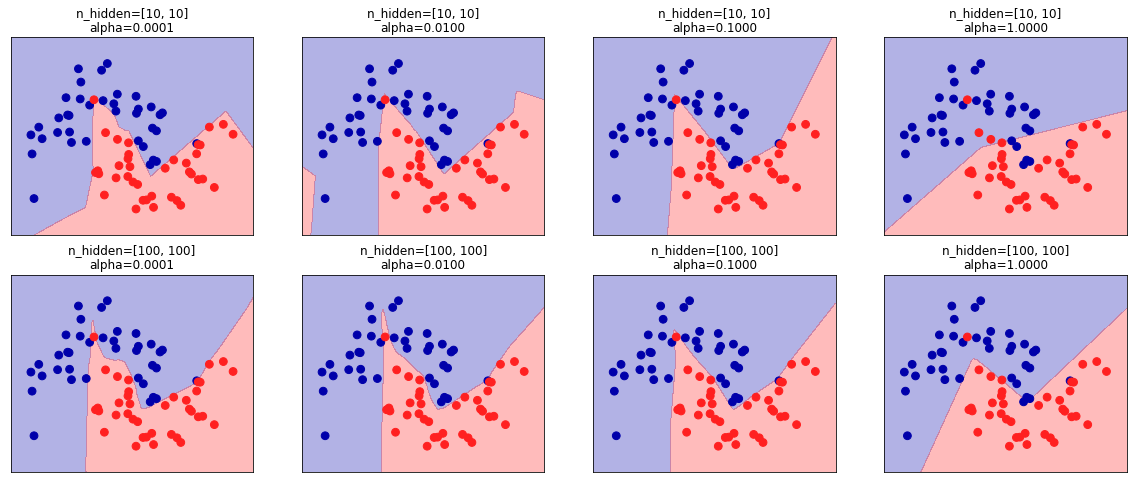

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for ax, n_hidden_nodes in zip(axes, [10, 100]):
 for axx, alpha in zip(ax, [0.0001, 0.01, 0.1, 1]):
   mlp = MLPClassifier(solver='lbfgs', random_state=0,
                       hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                       alpha=alpha)
   mlp.fit(X_train, y_train)
   mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=axx)
   axx.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)
   axx.set_title("n_hidden=[%d, %d]\nalpha=%.4f"
   % (n_hidden_nodes, n_hidden_nodes, alpha))


As you probably have realized by now, there are many ways to control the complexity
of a neural network: the number of hidden layers, the number of units in each hidden
layer, and the regularization (alpha). There are actually even more, which we won’t go
into here.
An important property of neural networks is that their weights are set randomly
before learning is started, and this random initialization affects the model that is
learned. That means that even when using exactly the same parameters, we can
obtain very different models when using different random seeds.
If the networks are large, and their complexity is chosen properly, this should not
affect accuracy too much, but it is worth keeping in mind (particularly for smaller
networks).
Here are plots of several models, all learned with the same settings of the parameters:


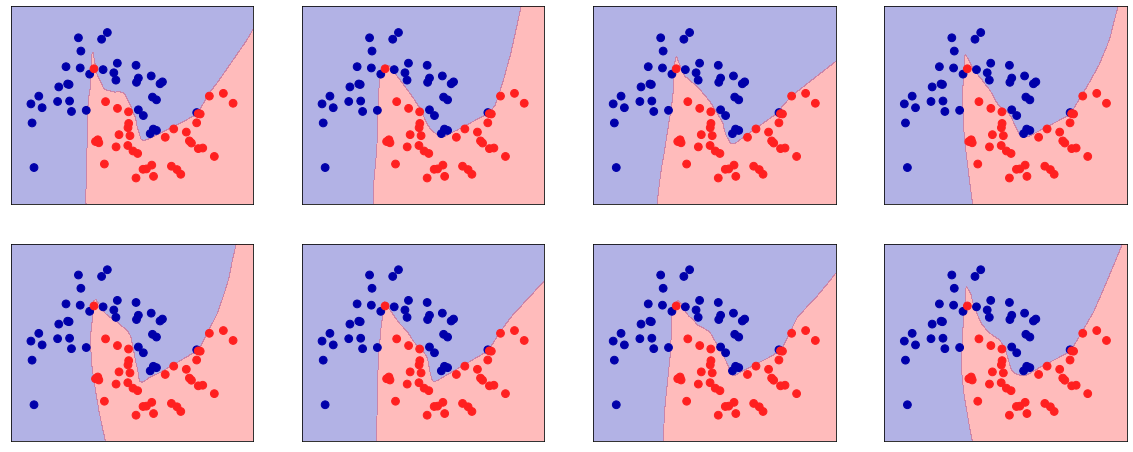

In [22]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
 mlp = MLPClassifier(solver='lbfgs', random_state=i,
 hidden_layer_sizes=[100, 100])
 mlp.fit(X_train, y_train)
 mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
 ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)